In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, UpSampling2D, Conv2D, Flatten, Input, Dense, Reshape, MaxPooling2D
from tensorflow.keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255

autoencoder = Sequential() 

autoencoder.add(Conv2D(16, kernel_size=3, padding="same", input_shape=(28, 28, 1), activation="relu"))
autoencoder.add(MaxPooling2D(pool_size=2, padding="same")) 
autoencoder.add(Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(MaxPooling2D(pool_size=2, padding="same")) 
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding="same", activation="relu"))

autoencoder.add(Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(UpSampling2D()) 
autoencoder.add(Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(UpSampling2D()) 
autoencoder.add(Conv2D(8, kernel_size=3, activation="relu"))
autoencoder.add(UpSampling2D()) 
autoencoder.add(Conv2D(1, kernel_size=3, padding="same", activation="sigmoid"))

autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 8)          

In [5]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

random_test = np.random.randint(X_test.shape[0], size=5)

Epoch 1/50
469/469 [==============================] - 22s 43ms/step - loss: 0.2165 - val_loss: 0.1341
Epoch 2/50
469/469 [==============================] - 20s 42ms/step - loss: 0.1246 - val_loss: 0.1152
Epoch 3/50
469/469 [==============================] - 20s 43ms/step - loss: 0.1120 - val_loss: 0.1075
Epoch 4/50
469/469 [==============================] - 20s 43ms/step - loss: 0.1065 - val_loss: 0.1034
Epoch 5/50
469/469 [==============================] - 20s 43ms/step - loss: 0.1033 - val_loss: 0.1008
Epoch 6/50
469/469 [==============================] - 20s 44ms/step - loss: 0.1010 - val_loss: 0.0987
Epoch 7/50
469/469 [==============================] - 20s 43ms/step - loss: 0.0992 - val_loss: 0.0976
Epoch 8/50
469/469 [==============================] - 21s 44ms/step - loss: 0.0977 - val_loss: 0.0958
Epoch 9/50
469/469 [==============================] - 22s 47ms/step - loss: 0.0965 - val_loss: 0.0949
Epoch 10/50
469/469 [==============================] - 22s 47ms/step - loss: 0.095

313/313 [==============================] - 2s 6ms/step


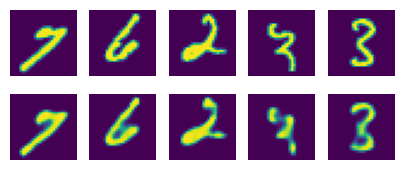

In [8]:
ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(7, 2))

for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()